# Pipeline

Experimentando classificação com `SVC` para explorar a implementação da `make_pipeline`

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

# Carregando intervalo de chb
file_range = [
    '01', '02', '03', '04', '05', '07', '08',
    '10', '11', '12', '13', '14', '15', '16',
    '17', '18', '19', '21', '22', '23', '24'
]

def dataframe_from_chb(chb_number:str):
    df = pd.read_csv(f'./chb{chb_number}/chb{chb_number}_com_dwt.csv')
    df['chb'] = chb_number
    return df

## Carregando dados

In [2]:
chb_df = pd.concat([dataframe_from_chb(file) for file in file_range], ignore_index=True)

chb_train = chb_df.query('chb != "11"')
chb_test:pd.DataFrame = chb_df.query('chb == "11"')

chb_train.pop('chb')
chb_test.pop('chb')

y_train, y_test = chb_train.pop('target').values, chb_test.pop('target').values
X_train, X_test = chb_train.values, chb_test.values

target_names = ['negative', 'positive']

chb_test.shape

(800, 756)

## Teste sem normalização

Teste sem normalização
              precision    recall  f1-score   support

    negative     0.7951    0.9700    0.8739       400
    positive     0.9615    0.7500    0.8427       400

    accuracy                         0.8600       800
   macro avg     0.8783    0.8600    0.8583       800
weighted avg     0.8783    0.8600    0.8583       800



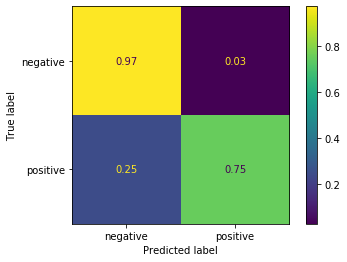

In [3]:
model_1 = SVC(random_state=0).fit(X_train, y_train)

y1_pred = model_1.predict(X_test)

print("Teste sem normalização")

plot_confusion_matrix(model_1, X_test, y_test, normalize='true', display_labels=target_names)

print(classification_report(y_test, y1_pred, target_names=target_names, digits=4))

## Teste com Normalização

Teste com normalização
              precision    recall  f1-score   support

    negative     0.8920    0.8875    0.8897       400
    positive     0.8881    0.8925    0.8903       400

    accuracy                         0.8900       800
   macro avg     0.8900    0.8900    0.8900       800
weighted avg     0.8900    0.8900    0.8900       800



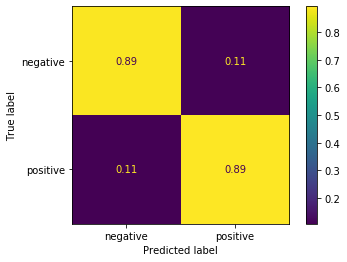

In [4]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_2 = SVC(random_state=0).fit(X_train_scaled, y_train)

y2_pred = model_2.predict(X_test_scaled)

print("Teste com normalização")

plot_confusion_matrix(model_2, X_test_scaled, y_test, normalize='true', display_labels=target_names)

print(classification_report(y_test, y2_pred, target_names=target_names, digits=4))

## Teste com Pipeline

Teste com Pipeline
              precision    recall  f1-score   support

    negative     0.8920    0.8875    0.8897       400
    positive     0.8881    0.8925    0.8903       400

    accuracy                         0.8900       800
   macro avg     0.8900    0.8900    0.8900       800
weighted avg     0.8900    0.8900    0.8900       800



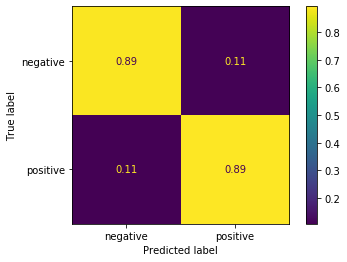

In [5]:
model_3 = make_pipeline(StandardScaler(), SVC(random_state=0)).fit(X_train, y_train)

y3_pred = model_3.predict(X_test)

print("Teste com Pipeline")

plot_confusion_matrix(model_3, X_test, y_test, normalize='true', display_labels=target_names)

print(classification_report(y_test, y3_pred, target_names=target_names, digits=4))